In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

train.head(3)
train.tail(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4751,4751,19.1,987.6,1.0,0.3,0.0,1006.8,987.8,21.2,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0


In [3]:
# 기온 
train.loc[:5:,["X00","X07","X28","X31","X32", "Y00","Y01" , "Y02","Y03" , "Y04","Y05" , "Y06","Y07" , "Y08","Y09" , "Y10","Y11" , "Y12","Y13"              , "Y14","Y15" , "Y16","Y17" , "Y18"            ]]

,X00,X07,X28,X31,X32,Y00,Y01,Y02,Y03,Y04,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,9.7,12.2,12.3,8.2,10.7,12.5,11.5,11.0,20.0,20.0,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,9.3,12.1,12.1,8.3,10.3,12.5,11.0,11.0,20.0,20.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,9.4,12.1,12.1,8.0,9.7,12.0,11.0,11.0,19.5,19.5,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,9.4,12.0,12.1,7.7,9.4,12.0,11.0,11.0,19.5,19.5,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,9.2,12.0,12.0,7.4,9.4,12.0,10.5,10.5,19.0,19.5,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
5,9.1,12.0,12.0,7.3,9.1,12.0,10.5,10.5,19.0,19.0,...,6.0,7.0,6.0,7.5,9.0,9.0,8.5,7.0,8.5,NaN


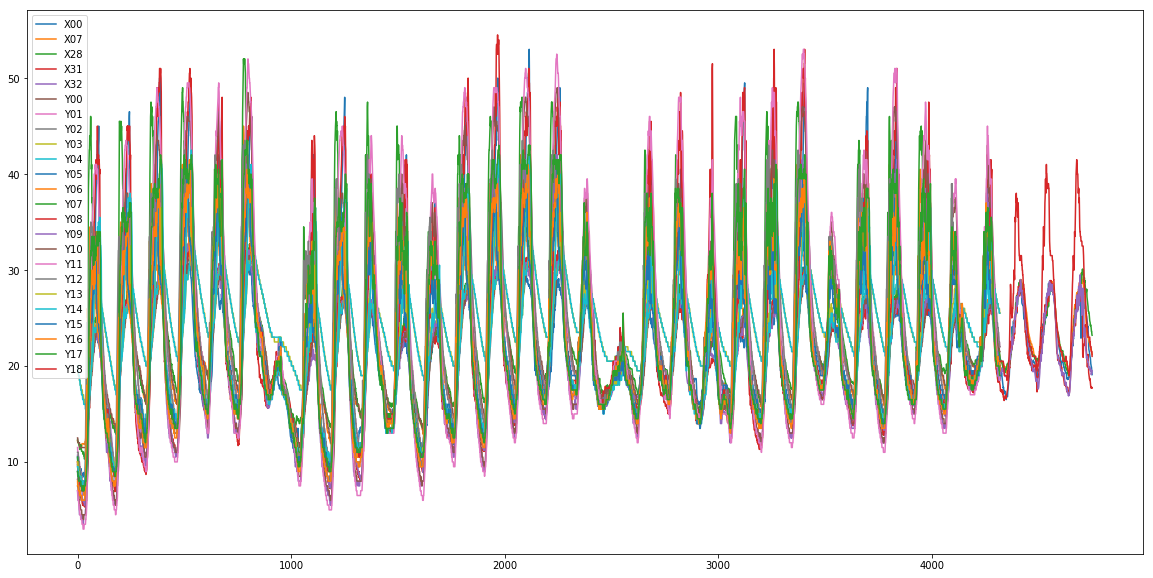

In [4]:
# 기온 
train.loc[:,["X00","X07","X28","X31","X32", "Y00","Y01" , "Y02","Y03" , "Y04","Y05" , "Y06","Y07" , "Y08","Y09" , "Y10","Y11" , "Y12","Y13", "Y14","Y15" , "Y16","Y17" , "Y18"]].plot(figsize=(20,10))

In [5]:
# 평균기온
mean_temp = train.loc[:,["X00","X07","X28","X31","X32", "Y00","Y01" , "Y02","Y03" , "Y04","Y05" , "Y06","Y07" , "Y08","Y09" , "Y10","Y11" , "Y12","Y13", "Y14","Y15" , "Y16","Y17" , "Y18"]].mean(axis=1)
mean_temp

0       10.656522
1       10.439130
2       10.186957
3       10.026087
4        9.869565
5        9.782609
6        9.504348
7        9.478261
8        9.382609
9        9.226087
10       9.086957
11       9.039130
12       8.973913
13       8.873913
14       8.865217
15       8.830435
16       8.765217
17       8.608696
18       8.517391
19       8.486957
20       8.413043
21       8.308696
22       8.213043
23       8.160870
24       8.139130
25       8.117391
26       8.047826
27       8.043478
28       8.056522
29       8.013043
          ...    
4722    24.783333
4723    24.416667
4724    24.233333
4725    23.983333
4726    23.800000
4727    23.533333
4728    23.350000
4729    23.183333
4730    23.033333
4731    23.016667
4732    22.983333
4733    22.700000
4734    22.500000
4735    22.100000
4736    21.950000
4737    21.883333
4738    21.816667
4739    21.700000
4740    21.583333
4741    21.433333
4742    21.366667
4743    21.116667
4744    21.066667
4745    20.916667
4746    20

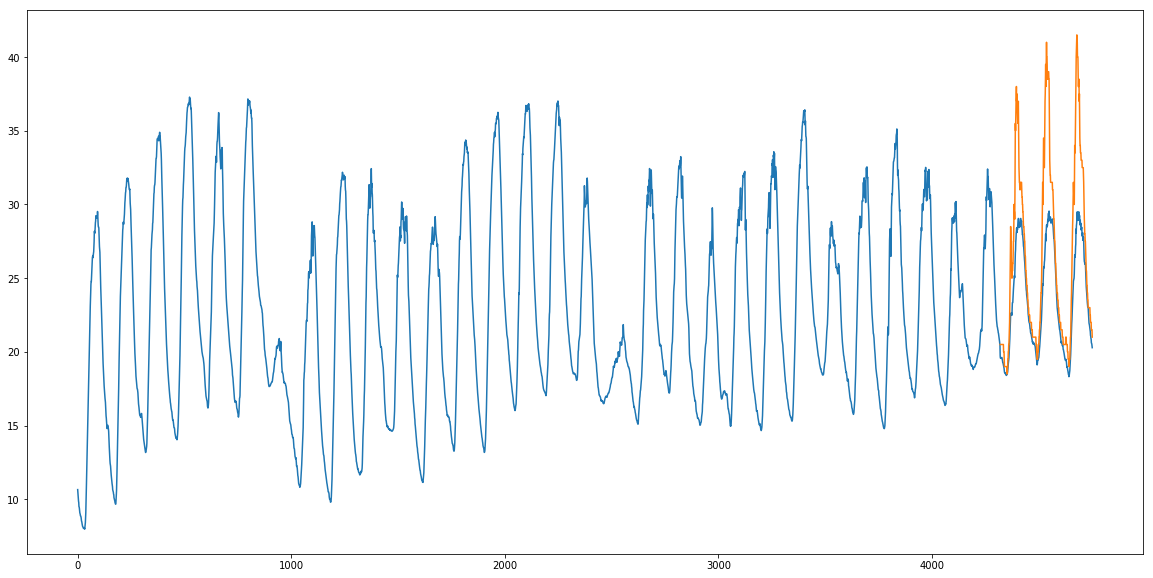

In [6]:
plt.figure(figsize=(20,10))
plt.plot(mean_temp)
plt.plot(train["Y18"])

In [7]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [8]:
t = train["Y18"].isna() 

In [9]:
null_index = t[t==True].index

In [10]:
# 평균기온으로 Y18 매움
train.loc[null_index, "Y18"] = train.loc[null_index, ["X00","X07","X28","X31","X32", "Y00","Y01" , "Y02","Y03" , "Y04","Y05" , "Y06","Y07" , "Y08","Y09" , "Y10","Y11" , "Y12","Y13", "Y14","Y15" , "Y16","Y17" , "Y18"]].mean(axis=1)

In [11]:
train.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,10.656522
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,10.439130
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,10.186957
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,10.026087
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,9.869565


In [12]:
# CORR 로 걸로보기
X_train = train.loc[:, ['X00','X07','X28','X31','X32','X02','X03','X18','X24','X26','X04','X10','X21','X36','X39','X05','X08','X09','X23','X33','X11','X14','X16','X19','X34','X12','X20','X30','X37','X38']]
y_train = train["Y18"]

In [13]:
lgb_train = lgb.Dataset(X_train, label=y_train)

lgb_param = {
    "objective":"regression",
    "metrics":"mae",
    "learning_rate":0.01
}

print("cv start")
cv_result = lgb.cv(
    lgb_param,
    lgb_train,
    num_boost_round=99999,
    nfold=5,
    early_stopping_rounds=10,
    stratified=False,
    verbose_eval=10 
)

print("train start")
lgb_model = lgb.train(
    lgb_param,
    lgb_train,
    num_boost_round=len(cv_result["l1-mean"])
)

cv start
[10]	cv_agg's l1: 5.17332 + 0.0846751
[20]	cv_agg's l1: 4.69341 + 0.0792522
[30]	cv_agg's l1: 4.25874 + 0.0736271
[40]	cv_agg's l1: 3.86589 + 0.0678552
[50]	cv_agg's l1: 3.51156 + 0.0624832
[60]	cv_agg's l1: 3.19147 + 0.0577781
[70]	cv_agg's l1: 2.90259 + 0.0535631
[80]	cv_agg's l1: 2.64151 + 0.0505391
[90]	cv_agg's l1: 2.40742 + 0.0469647
[100]	cv_agg's l1: 2.19755 + 0.042459
[110]	cv_agg's l1: 2.00867 + 0.0385606
[120]	cv_agg's l1: 1.83952 + 0.0349937
[130]	cv_agg's l1: 1.68779 + 0.0328296
[140]	cv_agg's l1: 1.55264 + 0.0304536
[150]	cv_agg's l1: 1.43146 + 0.0280759
[160]	cv_agg's l1: 1.32309 + 0.0261952
[170]	cv_agg's l1: 1.22601 + 0.0245286
[180]	cv_agg's l1: 1.1389 + 0.0229157
[190]	cv_agg's l1: 1.061 + 0.0222679
[200]	cv_agg's l1: 0.991549 + 0.021177
[210]	cv_agg's l1: 0.929089 + 0.0198644
[220]	cv_agg's l1: 0.873312 + 0.0191428
[230]	cv_agg's l1: 0.823189 + 0.0186367
[240]	cv_agg's l1: 0.779037 + 0.0185361
[250]	cv_agg's l1: 0.740313 + 0.0186848
[260]	cv_agg's l1: 0.705

[2050]	cv_agg's l1: 0.319803 + 0.0162029
[2060]	cv_agg's l1: 0.319665 + 0.0162078
[2070]	cv_agg's l1: 0.319484 + 0.0162071
[2080]	cv_agg's l1: 0.319273 + 0.0161726
[2090]	cv_agg's l1: 0.319107 + 0.01617
[2100]	cv_agg's l1: 0.318894 + 0.0161955
[2110]	cv_agg's l1: 0.318701 + 0.0162004
[2120]	cv_agg's l1: 0.318542 + 0.0161877
[2130]	cv_agg's l1: 0.318401 + 0.0161908
[2140]	cv_agg's l1: 0.318259 + 0.0161839
[2150]	cv_agg's l1: 0.318118 + 0.0161797
[2160]	cv_agg's l1: 0.317961 + 0.0161785
[2170]	cv_agg's l1: 0.317799 + 0.0161757
[2180]	cv_agg's l1: 0.317631 + 0.016194
[2190]	cv_agg's l1: 0.317507 + 0.0161666
[2200]	cv_agg's l1: 0.317339 + 0.0161747
[2210]	cv_agg's l1: 0.317191 + 0.0161644
[2220]	cv_agg's l1: 0.317007 + 0.0161355
[2230]	cv_agg's l1: 0.316828 + 0.0161467
[2240]	cv_agg's l1: 0.316659 + 0.0161655
[2250]	cv_agg's l1: 0.316487 + 0.0161629
[2260]	cv_agg's l1: 0.316297 + 0.0161688
[2270]	cv_agg's l1: 0.316162 + 0.0161823
[2280]	cv_agg's l1: 0.316007 + 0.0162174
[2290]	cv_agg's l1:

[4070]	cv_agg's l1: 0.301214 + 0.0161988
[4080]	cv_agg's l1: 0.301176 + 0.0162014
[4090]	cv_agg's l1: 0.301135 + 0.0162023
[4100]	cv_agg's l1: 0.301078 + 0.0162032
[4110]	cv_agg's l1: 0.301025 + 0.0162037
[4120]	cv_agg's l1: 0.300987 + 0.0162033
[4130]	cv_agg's l1: 0.300946 + 0.0161904
[4140]	cv_agg's l1: 0.3009 + 0.0161864
[4150]	cv_agg's l1: 0.300858 + 0.0161888
[4160]	cv_agg's l1: 0.300812 + 0.0161932
[4170]	cv_agg's l1: 0.300775 + 0.0161898
[4180]	cv_agg's l1: 0.300742 + 0.0161888
[4190]	cv_agg's l1: 0.300695 + 0.0162045
[4200]	cv_agg's l1: 0.300638 + 0.0162009
[4210]	cv_agg's l1: 0.300599 + 0.0161875
[4220]	cv_agg's l1: 0.300547 + 0.0161701
[4230]	cv_agg's l1: 0.300505 + 0.0161698
[4240]	cv_agg's l1: 0.300463 + 0.0161579
[4250]	cv_agg's l1: 0.300422 + 0.0161622
[4260]	cv_agg's l1: 0.300387 + 0.0161513
[4270]	cv_agg's l1: 0.30034 + 0.0161401
[4280]	cv_agg's l1: 0.300296 + 0.0161357
[4290]	cv_agg's l1: 0.300257 + 0.0161381
[4300]	cv_agg's l1: 0.300216 + 0.0161383
[4310]	cv_agg's l1:

[6080]	cv_agg's l1: 0.295777 + 0.0161514
[6090]	cv_agg's l1: 0.295764 + 0.0161462
[6100]	cv_agg's l1: 0.295743 + 0.0161496
[6110]	cv_agg's l1: 0.295719 + 0.0161538
[6120]	cv_agg's l1: 0.295696 + 0.0161517
[6130]	cv_agg's l1: 0.295679 + 0.0161489
[6140]	cv_agg's l1: 0.295667 + 0.0161523
[6150]	cv_agg's l1: 0.295648 + 0.016152
[6160]	cv_agg's l1: 0.29564 + 0.0161538
[6170]	cv_agg's l1: 0.29563 + 0.0161527
[6180]	cv_agg's l1: 0.295617 + 0.0161479
[6190]	cv_agg's l1: 0.295601 + 0.0161494
[6200]	cv_agg's l1: 0.295592 + 0.0161511
[6210]	cv_agg's l1: 0.295573 + 0.0161486
[6220]	cv_agg's l1: 0.295541 + 0.0161325
[6230]	cv_agg's l1: 0.295519 + 0.0161385
[6240]	cv_agg's l1: 0.295506 + 0.0161399
[6250]	cv_agg's l1: 0.295488 + 0.016142
[6260]	cv_agg's l1: 0.295472 + 0.0161478
[6270]	cv_agg's l1: 0.295454 + 0.0161422
[6280]	cv_agg's l1: 0.295442 + 0.0161406
[6290]	cv_agg's l1: 0.295429 + 0.0161374
[6300]	cv_agg's l1: 0.295409 + 0.0161486
[6310]	cv_agg's l1: 0.295379 + 0.0161377
[6320]	cv_agg's l1: 

[8090]	cv_agg's l1: 0.293236 + 0.0159186
[8100]	cv_agg's l1: 0.293229 + 0.0159156
[8110]	cv_agg's l1: 0.293225 + 0.0159111
[8120]	cv_agg's l1: 0.293222 + 0.0159164
[8130]	cv_agg's l1: 0.293217 + 0.0159155
[8140]	cv_agg's l1: 0.293212 + 0.0159166
[8150]	cv_agg's l1: 0.293205 + 0.0159157
[8160]	cv_agg's l1: 0.293196 + 0.0159169
[8170]	cv_agg's l1: 0.293189 + 0.0159204
[8180]	cv_agg's l1: 0.293179 + 0.0159176
[8190]	cv_agg's l1: 0.29317 + 0.0159116
[8200]	cv_agg's l1: 0.293168 + 0.0159055
[8210]	cv_agg's l1: 0.29316 + 0.0159078
[8220]	cv_agg's l1: 0.293151 + 0.0159093
[8230]	cv_agg's l1: 0.293148 + 0.0159055
[8240]	cv_agg's l1: 0.293144 + 0.0159047
[8250]	cv_agg's l1: 0.293132 + 0.0159005
[8260]	cv_agg's l1: 0.293126 + 0.0158963
[8270]	cv_agg's l1: 0.293123 + 0.0158961
[8280]	cv_agg's l1: 0.293117 + 0.0159007
[8290]	cv_agg's l1: 0.293107 + 0.0159026
[8300]	cv_agg's l1: 0.293102 + 0.0159061
[8310]	cv_agg's l1: 0.29309 + 0.015909
[8320]	cv_agg's l1: 0.293083 + 0.0159107
[8330]	cv_agg's l1: 

In [14]:
submission["Y18"] = lgb_model.predict(test.loc[:, ['X00','X07','X28','X31','X32','X02','X03','X18','X24','X26','X04','X10','X21','X36','X39','X05','X08','X09','X23','X33','X11','X14','X16','X19','X34','X12','X20','X30','X37','X38']])
submission.head()

,id,Y18
0,4752,20.193589
1,4753,20.249110
2,4754,20.290402
3,4755,20.032447
4,4756,19.819192


In [15]:
submission.to_csv('data/submission_0405_1.csv', index=False)